# LSTM Model for Manhattan


### Features
* wknd: Weekend flag
* holiday: Holiday flag
* hours_to_resolution_stdz: Hours to Resolution standardized annually
* AWND: weather features
* PGTM: weather features
* PRCP: weather features
* SNOW: weather features
* SNWD: weather features
* TMAX: weather features
* TMIN: weather features
* WDF2: weather features
* WDF5: weather features
* WSF2: weather features
* WSF5: weather features
* WT01: weather features
* WT02: weather features
* WT04: weather features
* WT06: weather features
* WT08: weather features
* WT11: weather features
* d-1_cnt: Complaint count of D-1
* d-2_cnt: Complaint count of D-2
* d-3_cnt: Complaint count of D-3
* d-4_cnt: Complaint count of D-4
* d-5_cnt: Complaint count of D-5
* d-6_cnt: Complaint count of D-6
* d-7_cnt: Complaint count of D-7
* d-8_cnt: Complaint count of D-8
* d-9_cnt: Complaint count of D-9
* d-10_cnt: Complaint count of D-10
* d-11_cnt: Complaint count of D-11
* d-12_cnt: Complaint count of D-12
* d-13_cnt: Complaint count of D-13
* d-14_cnt: Complaint count of D-14
* d-15_cnt: Complaint count of D-15
* d-16_cnt: Complaint count of D-16
* d-17_cnt: Complaint count of D-17
* d-18_cnt: Complaint count of D-18
* d-19_cnt: Complaint count of D-19
* d-20_cnt: Complaint count of D-20
* d-21_cnt: Complaint count of D-21
* d-22_cnt: Complaint count of D-22
* d-23_cnt: Complaint count of D-23
* d-24_cnt: Complaint count of D-24
* d-25_cnt: Complaint count of D-25
* d-26_cnt: Complaint count of D-26
* d-27_cnt: Complaint count of D-27
* d-28_cnt: Complaint count of D-28
* ahv_open_cnt: after hour variance open count


In [153]:
import torch
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import geopandas as gpd
import datetime
import matplotlib
from itertools import product
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy

import sys
sys.path.insert(0, '/Users/sunghoonyang/PycharmProjects/noise-capstone/analysis/311/duke')

from datetime import datetime
from dateutil.relativedelta import relativedelta

# precipitation data
from prep_dta import _2010, _2011, _2012, _2013, _2014, _2015, _2016, _2017, _2018
from american_holidays import american_holidays as _american_holidays_str
%matplotlib inline

In [125]:
features = pd.read_csv('/Users/sunghoonyang/Google Drive/Noise Capstone/data/LSTM_dataset.csv')

In [126]:
targets = pd.read_csv('/Users/sunghoonyang/Google Drive/Noise Capstone/data/LSTM_dataset_labels.csv')

In [127]:
ar_features = pd.read_csv('/Users/sunghoonyang/Google Drive/Noise Capstone/data/LSTM_ar_dataset.csv')

In [128]:
features.head()

,wknd,holiday,hours_to_resolution_stdz,AWND,PRCP,SNOW,SNWD,TMAX,WDF5,WSF5,WT01,WT02,WT04,WT08,d-1_cnt,d-2_cnt,d-3_cnt,d-4_cnt,d-5_cnt,d-6_cnt,d-7_cnt,d-8_cnt,d-9_cnt,d-10_cnt,d-11_cnt,d-12_cnt,d-13_cnt,d-14_cnt,d-15_cnt,d-16_cnt,d-17_cnt,d-18_cnt,d-19_cnt,d-20_cnt,d-21_cnt,d-22_cnt,d-23_cnt,d-24_cnt,d-25_cnt,d-26_cnt,d-27_cnt,d-28_cnt,ahv_open_cnt
0,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.054409,-0.678413,-0.365704,-0.052903,-0.364801,-0.676902,-0.676595,-0.051068,-0.362986,-0.050179,-0.362176,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,-0.359266,-0.671618,-0.671181,-0.357729,-0.357459,-0.670058,-0.669689,-0.355967,-0.355679,-0.668450,-0.668321,-0.668131,-0.50966
1,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,0.570154,-0.678413,-0.365704,-0.052903,-0.052266,-0.364435,-0.364098,-0.051068,1.199736,-0.675180,2.450534,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,0.266390,-0.671618,-0.358164,-0.044646,-0.044333,-0.356905,1.209269,-0.669142,-0.355679,-0.668450,-0.041359,-0.668131,-0.50966
2,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.678973,-0.366098,-0.053309,0.259503,-0.052266,-0.676902,-0.676595,-0.676091,-0.675530,-0.675180,-0.674699,-0.674027,-0.673530,-0.673262,-0.672701,-0.672357,-0.359266,-0.358690,-0.671181,-0.670812,-0.357459,-0.356905,-0.669689,-0.669142,-0.668918,-0.355143,-0.354840,-0.354589,-0.50966
3,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.054409,-0.053784,-0.365704,-0.365308,-0.052266,-0.364435,-0.676595,-0.363579,-0.362986,-0.675180,-0.362176,-0.674027,-0.360913,-0.047878,-0.672701,-0.359530,-0.046438,-0.671618,0.267869,-0.044646,0.268793,-0.356905,0.582949,-0.042792,-0.355679,-0.668450,-0.668321,-0.668131,-0.50966
4,1.579233,-0.150566,-0.523608,0.107604,0.207273,-0.093056,7.447692,-1.20886,0.236286,1.105861,1.448874,5.77986,-0.04969,1.93755,-0.366691,-0.053784,-0.365704,0.571909,-0.052266,-0.676902,0.260895,-0.676091,-0.675530,2.449824,0.575394,0.576100,-0.048297,0.577505,-0.047187,-0.672357,-0.046438,-0.358690,-0.358164,-0.670812,-0.670585,0.582554,-0.669689,-0.669142,-0.668918,-0.668450,-0.668321,-0.041047,-0.50966


In [129]:
targets.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.0,3.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,1.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,0.0,2.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,1.0,3.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [132]:
ar_features.head()

,d-1_cnt,d-2_cnt,d-3_cnt,d-4_cnt,d-5_cnt,d-6_cnt,d-7_cnt,d-8_cnt,d-9_cnt,d-10_cnt,d-11_cnt,d-12_cnt,d-13_cnt,d-14_cnt,d-15_cnt,d-16_cnt,d-17_cnt,d-18_cnt,d-19_cnt,d-20_cnt,d-21_cnt,d-22_cnt,d-23_cnt,d-24_cnt,d-25_cnt,d-26_cnt,d-27_cnt,d-28_cnt
0,-0.054409,-0.678413,-0.365704,-0.052903,-0.364801,-0.676902,-0.676595,-0.051068,-0.362986,-0.050179,-0.362176,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,-0.359266,-0.671618,-0.671181,-0.357729,-0.357459,-0.670058,-0.669689,-0.355967,-0.355679,-0.668450,-0.668321,-0.668131
1,0.570154,-0.678413,-0.365704,-0.052903,-0.052266,-0.364435,-0.364098,-0.051068,1.199736,-0.675180,2.450534,-0.674027,-0.673530,-0.673262,-0.672701,-0.046703,0.266390,-0.671618,-0.358164,-0.044646,-0.044333,-0.356905,1.209269,-0.669142,-0.355679,-0.668450,-0.041359,-0.668131
2,-0.678973,-0.366098,-0.053309,0.259503,-0.052266,-0.676902,-0.676595,-0.676091,-0.675530,-0.675180,-0.674699,-0.674027,-0.673530,-0.673262,-0.672701,-0.672357,-0.359266,-0.358690,-0.671181,-0.670812,-0.357459,-0.356905,-0.669689,-0.669142,-0.668918,-0.355143,-0.354840,-0.354589
3,-0.054409,-0.053784,-0.365704,-0.365308,-0.052266,-0.364435,-0.676595,-0.363579,-0.362986,-0.675180,-0.362176,-0.674027,-0.360913,-0.047878,-0.672701,-0.359530,-0.046438,-0.671618,0.267869,-0.044646,0.268793,-0.356905,0.582949,-0.042792,-0.355679,-0.668450,-0.668321,-0.668131
4,-0.366691,-0.053784,-0.365704,0.571909,-0.052266,-0.676902,0.260895,-0.676091,-0.675530,2.449824,0.575394,0.576100,-0.048297,0.577505,-0.047187,-0.672357,-0.046438,-0.358690,-0.358164,-0.670812,-0.670585,0.582554,-0.669689,-0.669142,-0.668918,-0.668450,-0.668321,-0.041047


In [133]:
features = np.array(features)
targets = np.array(targets)
ar_features = np.array(ar_features)

features = ar_features

In [134]:
features.shape, targets.shape

((58870, 43), (2030, 29))

## Fit model

In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset

torch.manual_seed(1)

In [136]:
# Measure sizes
spatial_bins = 29
T = int(features.shape[0] / spatial_bins)
L=spatial_bins
Fe=features.shape[1]
H=Fe*L*2
batch_size=28 
num_epochs = 10
features_nn = features.reshape(T, spatial_bins*Fe)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    features_nn
    , targets
    , test_size=0.25
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1522, 1247), (508, 1247), (1522, 29), (508, 29))

In [138]:
train_ds = DataLoader(
    torch.from_numpy(np.concatenate((X_train, y_train), axis=1))
    , batch_size=batch_size
    , drop_last=True
    , shuffle=True
    , 
)

test_ds = DataLoader(
    torch.from_numpy(np.concatenate((X_test, y_test), axis=1))
    , batch_size=batch_size
    , drop_last=True    
)

In [143]:
# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, feature_dim, hidden_dim, output_dim, num_layers, batch_size):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.feature_dim = feature_dim        
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim        
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(
            input_dim*feature_dim
            , self.hidden_dim
            , self.num_layers
            , dropout=0.3
            , batch_first=True
        )
        self.batchnorm1d_1 = nn.BatchNorm1d(batch_size)            
        self.linear_1 = nn.Linear(self.hidden_dim, int(self.hidden_dim/2))
        self.batchnorm1d_2 = nn.BatchNorm1d(batch_size)            
        self.linear_2 = nn.Linear(int(self.hidden_dim/2), output_dim)        
        
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.batchnorm1d_1(x)
        x = self.linear_1(x)
        x = F.relu(x)
        x = self.batchnorm1d_2(x)
        x = self.linear_2(x)        
        x = F.relu(x)        
        return x


In [144]:
model = LSTM(L, Fe, H, L, 2, batch_size)



In [146]:
loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-5)

#####################
# Train model
#####################
losses = []
for t in range(num_epochs):
    # Clear stored gradient
    model.train()
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()
    
    for batch_idx, data in enumerate(train_ds):
        X_train_bf = data[:, :Fe*L].reshape(1, batch_size, Fe*L).type(torch.FloatTensor)
        y_train_bf = data[:, Fe*L:].type(torch.FloatTensor)
        model.zero_grad()
        # Forward pass        
        y_pred = model(X_train_bf)
        collapsed_size = torch.tensor(y_train_bf.shape).cumprod(dim=0)[-1].item()
        pred = y_pred.clone()
        pred = pred.view(collapsed_size)
        target = y_train_bf.view(collapsed_size)
        loss = loss_fn(
            pred
            , target
        )
        # Backward pass
        loss.backward()
        # Update parameters
        optimiser.step()
        losses.append(loss.item())
        if batch_idx % 25 == 0:
            loss_t = np.mean(losses[-25:])
            print(
                '[train] [e]:%s [b]:%s - [loss]:%s' \
                % (t, batch_idx, str(loss_t))
            )


[train] [e]:0 [b]:0 - [loss]:17.63468360900879, [rmse] 4.199367048616826
[train] [e]:0 [b]:25 - [loss]:10.42106159210205, [rmse] 3.2033848554154076
[train] [e]:0 [b]:50 - [loss]:10.249910125732422, [rmse] 3.185295446578313
[train] [e]:1 [b]:0 - [loss]:9.517378807067871, [rmse] 3.071241430495708
[train] [e]:1 [b]:25 - [loss]:9.44781789779663, [rmse] 3.0555483574637234
[train] [e]:1 [b]:50 - [loss]:9.541237716674805, [rmse] 3.0616548974460165
[train] [e]:2 [b]:0 - [loss]:9.134186000823975, [rmse] 2.9992691762482724
[train] [e]:2 [b]:25 - [loss]:9.289330158233643, [rmse] 3.0253085117966108
[train] [e]:2 [b]:50 - [loss]:8.804146366119385, [rmse] 2.9524680463208823
[train] [e]:3 [b]:0 - [loss]:8.49113374710083, [rmse] 2.8980008271700517
[train] [e]:3 [b]:25 - [loss]:8.97791202545166, [rmse] 2.979236287267185
[train] [e]:3 [b]:50 - [loss]:8.888022480010987, [rmse] 2.9437977931216235
[train] [e]:4 [b]:0 - [loss]:9.018253593444824, [rmse] 2.972428039417025
[train] [e]:4 [b]:25 - [loss]:8.54358

In [147]:
pred.mean(), target.mean(), pred.var(), target.var()

(tensor(1.8868, grad_fn=<MeanBackward1>),
 tensor(1.9643),
 tensor(2.2359, grad_fn=<VarBackward0>),
 tensor(6.9099))

In [148]:
model.eval()
losses = []
preds = []
targets = []

with torch.no_grad():
    for batch_idx, data in enumerate(test_ds):
        X_test_bf = data[:, :Fe*L].reshape(1, batch_size, Fe*L).type(torch.FloatTensor)
        y_test_bf = data[:, Fe*L:].type(torch.FloatTensor)
        output = model(X_test_bf)
        collapsed_size = torch.tensor(y_test_bf.shape).cumprod(dim=0)[-1].item()
        pred = output.view(collapsed_size)
        preds.extend(pred)
        target = y_test_bf.view(collapsed_size)
        targets.extend(target)        
        loss = loss_fn(
            pred.squeeze()
            , target.squeeze()
        )
        losses.append(loss.item())
        loss_t = np.mean(losses[-1:])
        print(
            '[train] [e]:%s [b]:%s - [loss]:%s' \
            % (t, batch_idx, str(loss_t))
        )

[train] [e]:9 [b]:0 - [loss]:7.474278450012207, [rmse] 2.733912575993433
[train] [e]:9 [b]:1 - [loss]:5.810493469238281, [rmse] 2.4104966181422944
[train] [e]:9 [b]:2 - [loss]:9.690081596374512, [rmse] 3.112889436311575
[train] [e]:9 [b]:3 - [loss]:6.1006574630737305, [rmse] 2.4699509029682614
[train] [e]:9 [b]:4 - [loss]:10.298393249511719, [rmse] 3.209110826356329
[train] [e]:9 [b]:5 - [loss]:7.772143840789795, [rmse] 2.787856666771825
[train] [e]:9 [b]:6 - [loss]:6.421731472015381, [rmse] 2.534113547577413
[train] [e]:9 [b]:7 - [loss]:5.382690906524658, [rmse] 2.3200626945245806
[train] [e]:9 [b]:8 - [loss]:8.977123260498047, [rmse] 2.996184784104286
[train] [e]:9 [b]:9 - [loss]:7.4767608642578125, [rmse] 2.7343666294514737
[train] [e]:9 [b]:10 - [loss]:9.242692947387695, [rmse] 3.0401797557690062
[train] [e]:9 [b]:11 - [loss]:6.062053203582764, [rmse] 2.4621237181715228
[train] [e]:9 [b]:12 - [loss]:6.040811061859131, [rmse] 2.457806148144953
[train] [e]:9 [b]:13 - [loss]:5.3992576

<Figure size 432x288 with 0 Axes>

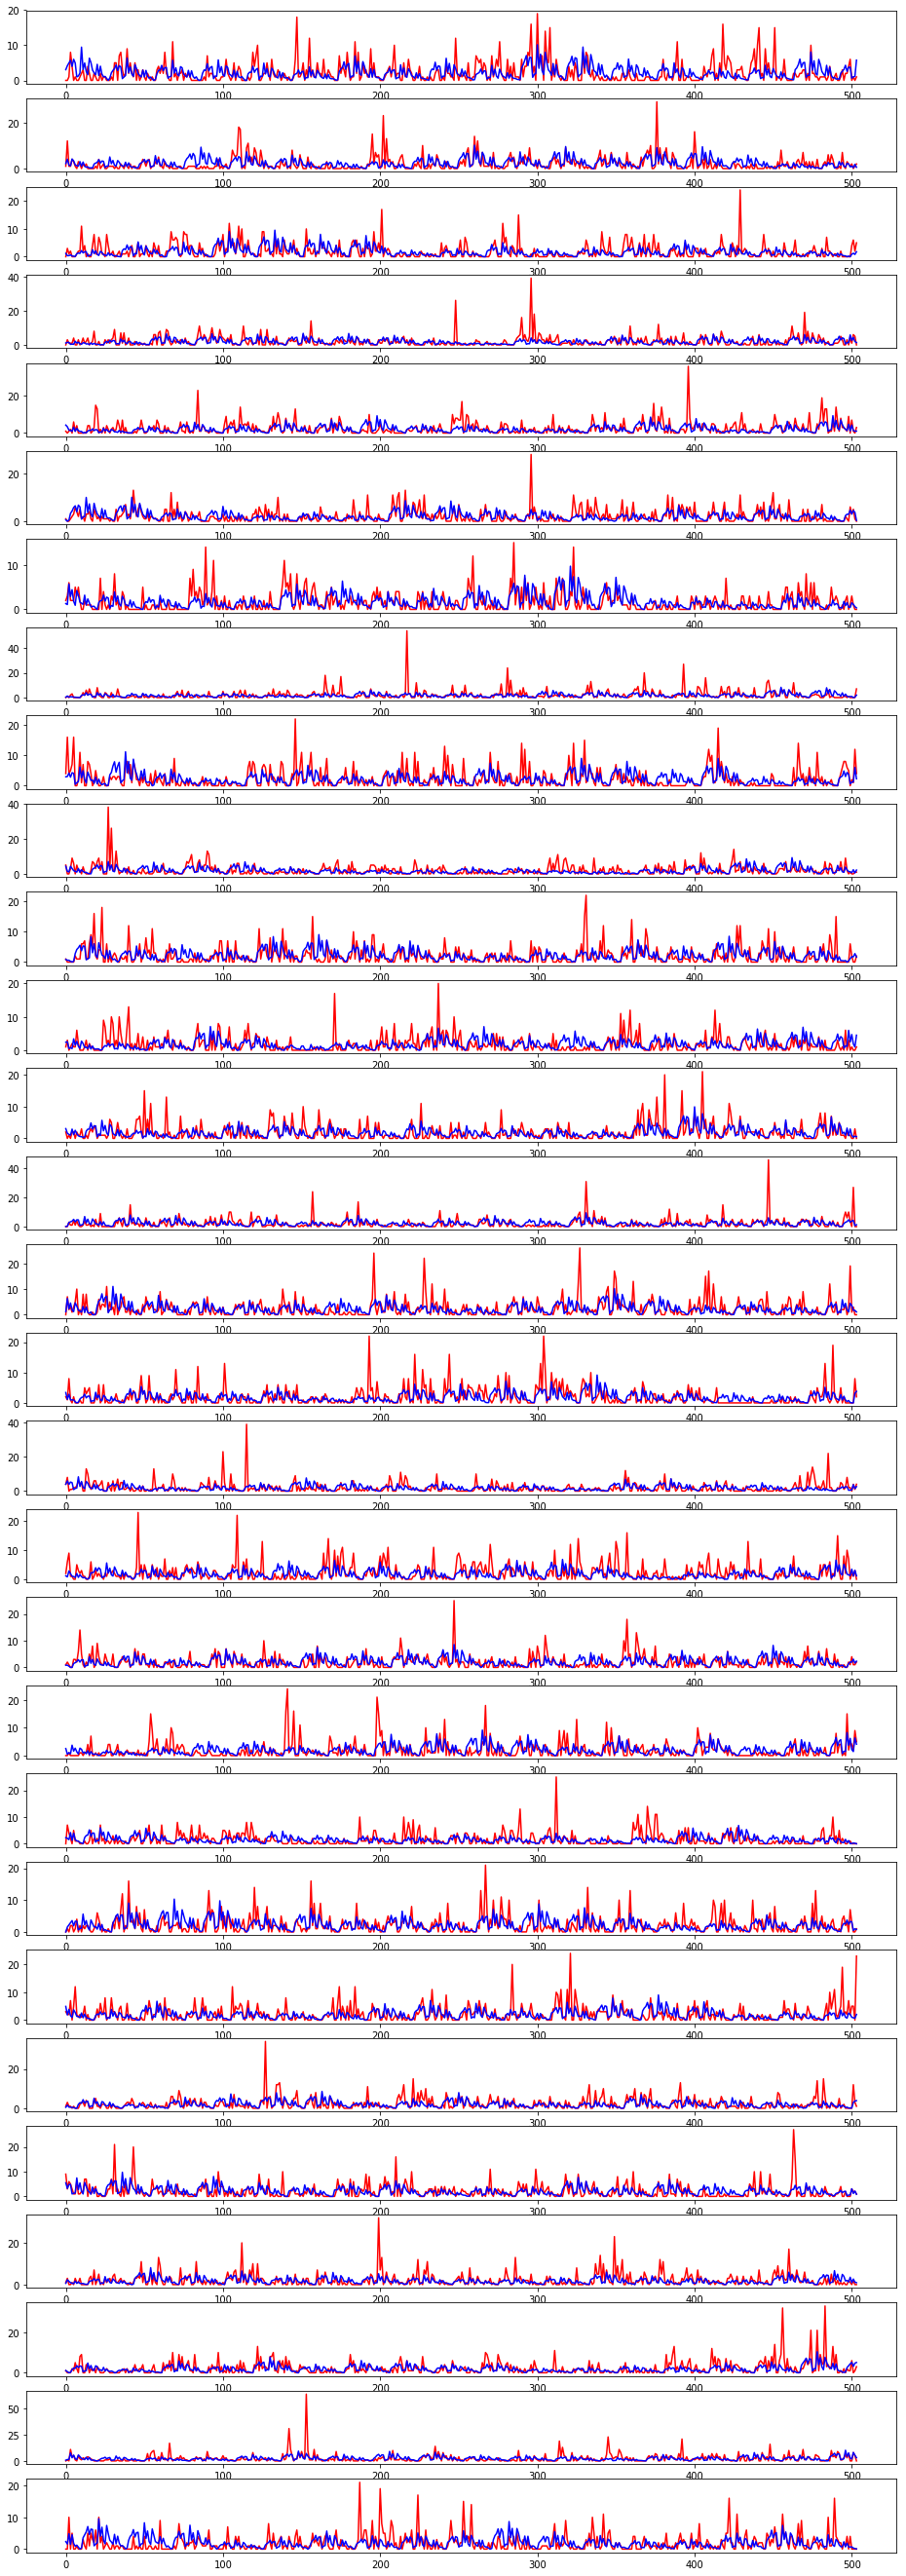

In [152]:
target_vals = np.array(targets).reshape(29, len(targets) // 29)
pred_vals = np.array(preds).reshape(29, len(targets) // 29)

plt.clf()
plt.tight_layout()
fig, axs = plt.subplots(L, 1, figsize=(16, 48))
for i in range(L):
    axs[i].plot(range(len(targets) // 29), target_vals[i], 'r-', pred_vals[i], 'b-')
    
    
